<a href="https://colab.research.google.com/github/GourabR/Quantium---Customer-Analytics/blob/main/Experminentation_and_uplift1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Project Type`** - EDA - Experminentation and uplift

**`Contribution`** - Individual

# About the project

This project is the continuation of the previous project, where we have performed data validation, data wrangling, data preperation techniques. We dove deep into the data and explored the data to take out some valuable insights.

In this project we are about the compare the store performances of three previously selected trial stores which are as follows: 77, 86, 88.

We have seperated this project into 3 parts for our convenience. Our first task would be to select only those stores which have sales in all of the months for the entire year to campare performance with the trial stores.

Here comes the most interesting and challenging part, as our second task we need to compare each and every store which have sales over the entire year with each one of the trial stores to find out the most suitable store(control store) for each trial store based on the following metrices.

*  *Total sales per month*
*  *Total number of footfall per month*
*  *Monthly average transaction per customer*

Once we find out the control stores, our third task would be to campare the store performance between the trial stores and the control stores for a given date range(Feb, 2019 - April, 2019).

# *Let's get started!*

In [ ]:
# Importing libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset.

df = pd.read_csv('/content/QVI_data.csv')

In [ ]:
# Checking the first 5 rows.

df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
# Checking the below 5 rows.

df.tail()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget
264833,2373711,2018-12-14,88,241815,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,SMITHS,YOUNG SINGLES/COUPLES,Mainstream


In [ ]:
# Checking the shape of the data.

df.shape

(264834, 12)

In [ ]:
# Checking for the null values in each column.

df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
# Getting familiour the overall information about the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
# Checking the rows and columns of the first trial store 77.

df[df['STORE_NBR'] == 77]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget


In [ ]:
# Checking the rows and columns of the second trial store 86.

df[df['STORE_NBR'] == 86]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
82393,86000,2018-08-26,86,84137,90,Tostitos Smoked Chipotle 175g,2,8.8,175,TOSTITOS,YOUNG FAMILIES,Premium
82394,86000,2018-09-25,86,84138,88,Kettle Honey Soy Chicken 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Premium
82395,86000,2019-02-19,86,84139,41,Doritos Salsa Mild 300g,2,5.2,300,DORITOS,YOUNG FAMILIES,Premium
82396,86000,2018-11-20,86,84140,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,SMITHS,YOUNG FAMILIES,Premium
82397,86000,2018-11-30,86,84141,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG FAMILIES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
153415,155479,2018-08-19,86,155508,74,Tostitos Splash Of Lime 175g,2,8.8,175,TOSTITOS,NEW FAMILIES,Mainstream
153416,155479,2018-11-21,86,155509,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,NEW FAMILIES,Mainstream
153417,155485,2018-11-08,86,155552,97,RRD Salt & Vinegar 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Mainstream
153418,155489,2018-08-15,86,155582,78,Thins Chips Salt & Vinegar 175g,2,6.6,175,THINS,RETIREES,Premium


In [ ]:
# Checking the rows and columns of the third trial store 88.

df[df['STORE_NBR'] == 88]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
84429,88000,2018-09-12,88,86220,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Budget
84430,88000,2018-10-26,88,86221,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,MIDAGE SINGLES/COUPLES,Budget
84431,88000,2019-02-02,88,86222,46,Kettle Original 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
84432,88000,2019-05-01,88,86223,47,Doritos Corn Chips Original 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Budget
84433,88000,2019-05-02,88,86224,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


***`Note :`*** We are given a date column in our dataframe, extracting month name and month number will help in our task.

In [ ]:
# Creating a month column from the given date column which will hold the month's name.

df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.strftime('%B')

In [ ]:
# Creating a function which will return month number corresponding to the month names.

def transform(col):
  if col == 'January':
    month_no = 1
  elif col == 'February':
    month_no = 2
  elif col == 'March':
    month_no = 3
  elif col == 'April':
    month_no = 4
  elif col == 'May':
    month_no = 5
  elif col == 'June':
    month_no = 6
  elif col == 'July':
    month_no = 7
  elif col == 'August':
    month_no = 8
  elif col == 'September':
    month_no = 9
  elif col == 'October':
    month_no = 10
  elif col == 'November':
    month_no = 11
  elif col == 'December':
    month_no = 12

  return month_no

In [ ]:
# Applying the function on the month column and creating a new column which will hold the month number.

df['MONTH_NO'] = df['MONTH'].apply(transform)

In [ ]:
# Checking how the dataframe is it looking now.

df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,MONTH_NO
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,October,10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,September,9
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,March,3
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,March,3
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,November,11


***`Note :`*** Remember we need to take only those stores which have sales over the entire year. So let's select those stores first and then we will create a function which will take two parameters, the list of store numbers and one trial store number. It will return the most appropriate control store for the given trial store based on the above mention three metrices.

Let's continue..

In [ ]:
# Creating a list which will hold all the store numbers which have sales in every month for the entire year.

df['DATE'] = pd.to_datetime(df['DATE'])

monthly_sales_count = df.groupby(['STORE_NBR', pd.Grouper(key='DATE', freq='M')])['TOT_SALES'].count().reset_index()
monthly_sales_count.rename(columns={'TOT_SALES': 'SALES_COUNT'}, inplace=True)

all_months = pd.date_range(start='2018-07-01', end='2019-06-30', freq='M')

stores_with_sales_in_all_months = monthly_sales_count.groupby('STORE_NBR')['DATE'].apply(lambda x: set(x) == set(all_months))
stores_with_sales_in_all_months = stores_with_sales_in_all_months[stores_with_sales_in_all_months].index.tolist()

In [ ]:
# Creating a function which will take two parameters, the above list of store numbers and one trial store number. It will return the most appropriate control store for the given trial store based on the above mention three metrices.

try:
  def select_control_store(stores_with_sales_in_all_months, store_no):

      a = df[df['STORE_NBR'] == store_no].groupby('MONTH')['TOT_SALES'].sum()
      b = df[df['STORE_NBR'] == store_no].groupby('MONTH')['LYLTY_CARD_NBR'].size()
      transactions_per_month_trial5 = df[df['STORE_NBR'] == store_no].groupby(['MONTH_NO', 'MONTH'])['TXN_ID'].size()
      customers_per_month_trial5 = df[df['STORE_NBR'] == store_no].groupby(['MONTH_NO', 'MONTH'])['LYLTY_CARD_NBR'].nunique()
      c = (transactions_per_month_trial5 / customers_per_month_trial5).reset_index().rename(columns={0: 'avg trans p cust'})

      correlation_dict_d = {}
      correlation_dict_e = {}
      correlation_dict_f = {}

      for i in stores_with_sales_in_all_months:
          if i == store_no:
              continue
          else:
              d = df[df['STORE_NBR'] == i].groupby('MONTH')['TOT_SALES'].sum()
              e = df[df['STORE_NBR'] == i].groupby('MONTH')['LYLTY_CARD_NBR'].size()
              transactions_per_month_trial5 = df[df['STORE_NBR'] == i].groupby(['MONTH_NO', 'MONTH'])['TXN_ID'].size()
              customers_per_month_trial5 = df[df['STORE_NBR'] == i].groupby(['MONTH_NO', 'MONTH'])['LYLTY_CARD_NBR'].nunique()
              f = (transactions_per_month_trial5 / customers_per_month_trial5).reset_index().rename(columns={0: 'avg trans p cust'})


          correlation_matrix_d = np.corrcoef(a, d)
          correlation_d = correlation_matrix_d[0, 1]
          correlation_dict_d[i] = correlation_d

          correlation_matrix_e = np.corrcoef(b, e)
          correlation_e = correlation_matrix_e[0, 1]
          correlation_dict_e[i] = correlation_e

          if len(c['avg trans p cust']) > len(f['avg trans p cust']):
              correlation_matrix_f = np.corrcoef(c['avg trans p cust'].head(len(f['avg trans p cust'])), f['avg trans p cust'].head(len(f['avg trans p cust'])))
          else:
              correlation_matrix_f = np.corrcoef(c['avg trans p cust'].head(len(c['avg trans p cust'])), f['avg trans p cust'].head(len(c['avg trans p cust'])))

          correlation_f = correlation_matrix_f[0, 1]
          correlation_dict_f[i] = correlation_f

      max_corr_stores_d = sorted([(store, correlation) for store, correlation in correlation_dict_d.items() if not np.isnan(correlation)], key=lambda x: x[1], reverse=True)
      max_corr_stores_e = sorted([(store, correlation) for store, correlation in correlation_dict_e.items() if not np.isnan(correlation)], key=lambda x: x[1], reverse=True)
      max_corr_stores_f = sorted([(store, correlation) for store, correlation in correlation_dict_f.items() if not np.isnan(correlation)], key=lambda x: x[1], reverse=True)

      common_stores = set([store for store, _ in max_corr_stores_d[:30]]) & set([store for store, _ in max_corr_stores_e[:30]]) & set([store for store, _ in max_corr_stores_f[:30]])

      common_stores_corr_d = [(store, correlation) for store, correlation in max_corr_stores_d if store in common_stores]
      common_stores_corr_e = [(store, correlation) for store, correlation in max_corr_stores_e if store in common_stores]
      common_stores_corr_f = [(store, correlation) for store, correlation in max_corr_stores_f if store in common_stores]

      result_d = []
      result_e = []
      result_f = []

      for store, correlation in common_stores_corr_d:
          result_d.append((store, correlation))

      for store, correlation in common_stores_corr_e:
          result_e.append((store, correlation))

      for store, correlation in common_stores_corr_f:
          result_f.append((store, correlation))

      candidate_stores = result_d, result_e, result_f

      my_dict = {}
      for i in candidate_stores:
        if len(i) > 1:
          for j in i:
            store_number = j[0]
            co = j[1]

            if store_number in my_dict:
              my_dict[store_number] += co
            else:
              my_dict[store_number] = co
        else:
          return candidate_stores[0][0][0]

      max_corr = max(my_dict.values())
      for key,values in my_dict.items():
        if values == max_corr:
          eligible_store = key

      return eligible_store
except Exception as e:
  print(e)

In [ ]:
# finding the control store for the trial store 77.

trail_store = 77
control_77 = select_control_store(stores_with_sales_in_all_months, trail_store)
print(f"The control store for the trial store 77 is :{control_77}")

The control store for the trial store 77 is :115


In [ ]:
# finding the control store for the trial store 86.

trail_store = 86
control_86 = select_control_store(stores_with_sales_in_all_months, trail_store)
print(f"The control store for the trial store 86 is :{control_86}")

The control store for the trial store 86 is :22


In [ ]:
# finding the control store for the trial store 88.

trail_store = 88
control_88 = select_control_store(stores_with_sales_in_all_months, trail_store)
print(f"The control store for the trial store 88 is :{control_88}")

The control store for the trial store 88 is :201


***`Note :`*** As we can see, we have successfully found control stores for each one of the trail stores listed above. Now let's go ahead and select data from the given date range(Feb, 2019 - April, 2019)

In [ ]:
# Checking the available months in our dataframe.

df['MONTH'].unique()

array(['October', 'September', 'March', 'November', 'December', 'July',
       'June', 'April', 'January', 'August', 'May', 'February'],
      dtype=object)

In [ ]:
# Selecting data in between the date range.

date_range = df[(df['DATE'] >= '2019-02-01') & (df['DATE'] <= '2019-04-30')]

In [ ]:
date_range['MONTH_NO'].unique()

array([3, 4, 2])

***`Note :`*** Now that we have found the control stores for each trial stores, and selected a date range, it's time for us to compare the performance between them.
Let's create a function which will compare store performance based on the following metrices:


*  Total sales per month

*  Monthly average transaction per customer

*  Total number of footfall per month

In [ ]:
# Creating a function which will take the trial store and the corresponding control store and compare their performance based on above dicussed metrics through visualization.

def comparison1(trial, control, data = date_range):

  monthly_sales_trial = date_range[date_range['STORE_NBR'] == trial].groupby(['MONTH_NO','MONTH'])['TOT_SALES'].sum().reset_index().sort_values(by = 'MONTH_NO', ascending = True)
  monthly_sales_control = date_range[date_range['STORE_NBR'] == control].groupby(['MONTH_NO','MONTH'])['TOT_SALES'].sum().reset_index().sort_values(by = 'MONTH_NO', ascending = True)

  transactions_per_month_trial = date_range[date_range['STORE_NBR'] == trial].groupby(['MONTH_NO', 'MONTH'])['TXN_ID'].size()
  customers_per_month_trial = date_range[date_range['STORE_NBR'] == trial].groupby(['MONTH_NO', 'MONTH'])['LYLTY_CARD_NBR'].nunique()
  atp_trial = (transactions_per_month_trial / customers_per_month_trial).reset_index().rename(columns={0: 'avg trans p cust'})

  transactions_per_month_control = date_range[date_range['STORE_NBR'] == control].groupby(['MONTH_NO', 'MONTH'])['TXN_ID'].size()
  customers_per_month_control = date_range[date_range['STORE_NBR'] == control].groupby(['MONTH_NO', 'MONTH'])['LYLTY_CARD_NBR'].nunique()
  atp_control = (transactions_per_month_control / customers_per_month_control).reset_index().rename(columns={0: 'avg trans p cust'})

  monthly_footfall_trial = date_range[date_range['STORE_NBR'] == trial].groupby(['MONTH_NO','MONTH'])['LYLTY_CARD_NBR'].size().reset_index().sort_values(by = 'MONTH_NO', ascending = True)
  monthly_footfall_control = date_range[date_range['STORE_NBR'] == control].groupby(['MONTH_NO','MONTH'])['LYLTY_CARD_NBR'].size().reset_index().sort_values(by = 'MONTH_NO', ascending = True)

  if trial == 77:
    color1 = '#3A544F'
    color2 = '#5D4496'
  elif trial == 86:
    color1 = '#4C543A'
    color2 = '#54423A'
  else:
    color1 = '#3E899D'
    color2 = '#A56385'

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))

  X = atp_trial['MONTH']
  Y = atp_trial['avg trans p cust']
  Z = atp_control['avg trans p cust']

  X_axis = np.arange(len(X))

  ax[0].bar(X_axis - 0.2, Y, 0.4, label=trial, color=color1)
  ax[0].bar(X_axis + 0.2, Z, 0.4, label=control, color=color2)

  ax[0].set_xticks(X_axis)
  ax[0].set_xticklabels(X)

  ax[0].set_xlabel("Months")
  ax[0].set_ylabel('Average Transaction Per Customer')
  ax[0].set_title("Comparison of monthly average transactions per customer of\n store {} vs control store {}".format(trial, control))
  ax[0].legend()

  p = monthly_sales_trial['MONTH']
  q = monthly_sales_trial['TOT_SALES']
  r = monthly_sales_control['TOT_SALES']

  s_axis = np.arange(len(p))

  ax[1].bar(s_axis - 0.2, q, 0.4, label=trial, color = color1)
  ax[1].bar(s_axis + 0.2, r, 0.4, label=control, color = color2)

  ax[1].set_xticks(s_axis)
  ax[1].set_xticklabels(p)

  ax[1].set_xlabel("Months")
  ax[1].set_ylabel("Total Sales")
  ax[1].set_title("Sales comparison at monthly level  trial store {} vs\n control store {}".format(trial, control))
  ax[1].legend()

  e = monthly_footfall_trial['MONTH']
  s = monthly_footfall_trial['LYLTY_CARD_NBR']
  t = monthly_footfall_control['LYLTY_CARD_NBR']

  u_axis = np.arange(len(e))

  ax[2].bar(u_axis - 0.2, s, 0.4, label=trial, color= color1)
  ax[2].bar(u_axis + 0.2, t, 0.4, label=control, color= color2)

  ax[2].set_xticks(u_axis)
  ax[2].set_xticklabels(e)

  ax[2].set_xlabel("Months")
  ax[2].set_ylabel("Total no of footfall")
  ax[2].set_title("Footfall comparison at monthly level trial store {} vs\n control store {}".format(trial, control))
  ax[2].legend()

  plt.tight_layout()
  plt.show()

***`Note :`*** Now that we are done with creating functions to compare performance between stores based on the most important metrices, now let's create another function which will help us to visualize the comparison between two stores based on the type of customer they came across and their percentages.

In [ ]:
# Creating a function which will take the trial store and the corresponding control store and compare their performance based on above dicussed metrics through visualization.

def comparison2(trial, control, data=date_range, rad=1.1):
  if trial == 77:
      custom_colors1 = ['#3A544F','#597A73','#789D96']
      custom_colors2 = ['#513C81','#7156AE', '#8164C5']
  elif trial == 86:
      custom_colors1 = ['#4C543A', '#6D7855','#89966C']
      custom_colors2 = ['#54423A', '#7A6156', '#96796C']
  else:
      custom_colors1 = ['#2C5E6B','#3D7D8E','#4D9AAE']
      custom_colors2 = ['#694256','#8B5A73','#B07493']

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

  ax[0].pie(data[data['STORE_NBR'] == trial]['PREMIUM_CUSTOMER'].value_counts(),
            labels=data[data['STORE_NBR'] == trial]['PREMIUM_CUSTOMER'].value_counts().index,
            colors=custom_colors1, autopct='%1.1f%%', pctdistance=0.80, radius=rad, wedgeprops={'edgecolor': 'white'})
  ax[0].set_title('Trial Store {}'.format(trial), fontsize=12, fontweight='bold')
  ax[0].add_artist(plt.Circle((0, 0), rad * 0.45, fc='white'))

  ax[1].pie(data[data['STORE_NBR'] == control]['PREMIUM_CUSTOMER'].value_counts(),
            labels=data[data['STORE_NBR'] == control]['PREMIUM_CUSTOMER'].value_counts().index,
            colors=custom_colors2, autopct='%1.1f%%', pctdistance=0.80, radius=rad, wedgeprops={'edgecolor': 'white'})
  ax[1].set_title('Control Store {}'.format(control), fontsize=12, fontweight='bold')
  ax[1].add_artist(plt.Circle((0, 0), rad * 0.45, fc='white'))

  plt.tight_layout()
  plt.show()


***`Note :`*** Let's create our last function to compare the two stores based on the customer segment of different lifestages they have come across and their percentages.

In [ ]:
# Creating a function which will take the trial store and the corresponding control store and compare their performance based on above dicussed metrics through visualization.

def comparison3(trial, control, data=date_range, rad=1.1):

  if trial == 77:
    custom_colors1 = ['#3E5652','#516F69','#64857F','#789D96','#8AB2AA','#9DC6BE','#B1DBD3']
    custom_colors2 = ['#38216F','#472E80', '#573D92','#674EA1','#7D66B4','#947FC5','#B49DE8']
  elif trial == 86:
    custom_colors1 = ['#4B513D','#636D4D','#728054','#7E8E58','#8BA15A','#98B45A','#A3C653']
    custom_colors2 = ['#54423A','#6D5145','#805A49','#96654F','#AA6E54','#CC7F5D','#EC936B']
  else:
    custom_colors1 = ['#2B525C','#366D7C','#3C8092','#4697AC','#41A5BF','#46B9D7','#8EE3F9']
    custom_colors2 = ['#5C414F','#784E63','#925876','#A95C83','#BF6292','#E86AAA','#FE9FD0']

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

  ax[0].pie(date_range[date_range['STORE_NBR'] == trial]['LIFESTAGE'].value_counts(), labels = date_range[date_range['STORE_NBR'] == trial]['LIFESTAGE'].value_counts().index, colors = custom_colors1, autopct = '%1.1f%%', radius = rad, pctdistance=0.80, textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'white'})
  ax[0].set_title('Trial Store {}'.format(trial), fontsize=12, fontweight='bold')
  ax[0].add_artist(plt.Circle((0, 0), rad * 0.45, fc='white'))

  ax[1].pie(date_range[date_range['STORE_NBR'] == control]['LIFESTAGE'].value_counts(), labels = date_range[date_range['STORE_NBR'] == control]['LIFESTAGE'].value_counts().index, colors = custom_colors2, autopct = '%1.1f%%', radius = rad, pctdistance=0.80, textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'white'})
  ax[1].set_title('Trial Store {}'.format(control), fontsize=12, fontweight='bold')
  ax[1].add_artist(plt.Circle((0, 0), rad * 0.45, fc='white'))

  plt.tight_layout()
  plt.show()

# *Store performance comparison for the trial store 77 and control store 115*

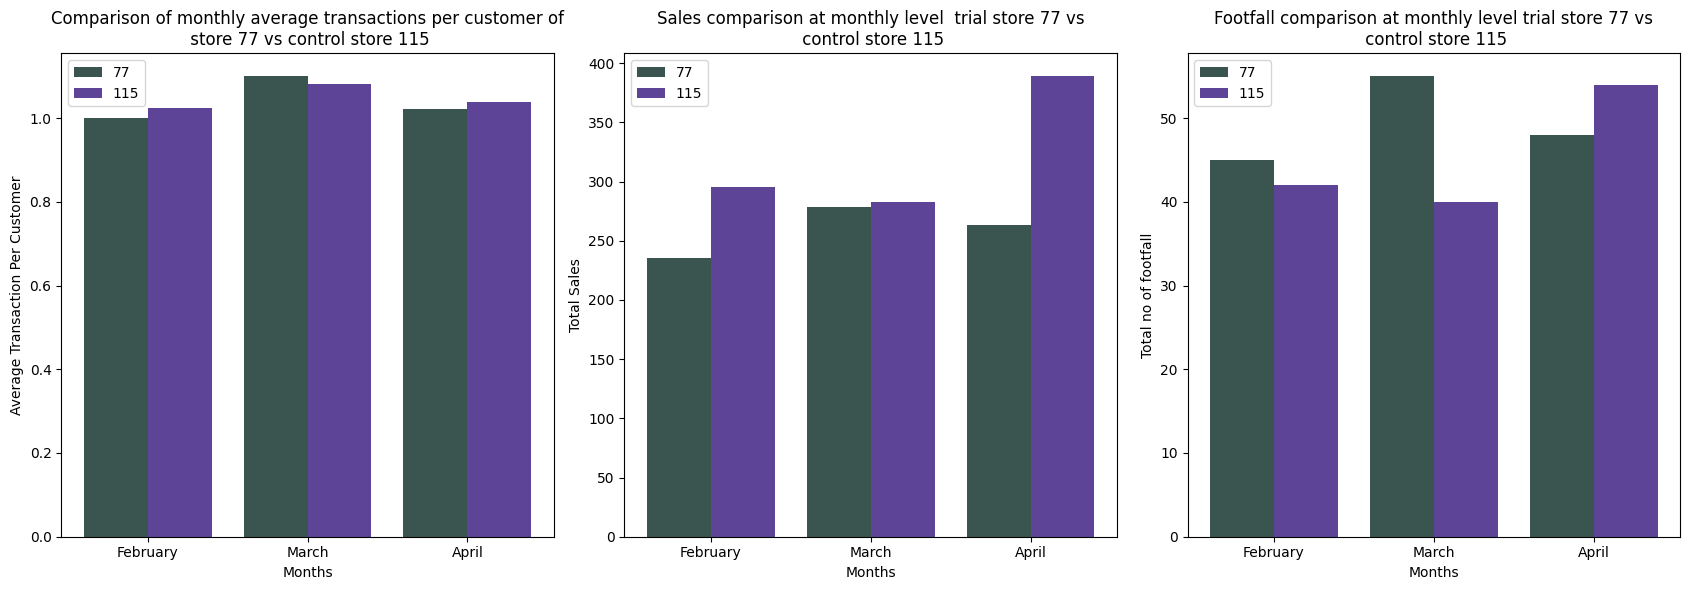

In [ ]:
comparison1(77,control_77)

***`Inference :`*** In the above graph we can see monthly average transaction of the trial store 77 had been somewhat similar to to the control store 115. However if we look at the graph number two which is total sales comparison, we will be able to see that sales were pretty less as compared to to number of customers it came across. Overall, it can be said that control store 115 can do comparatively better with a little less number of customer. On the other hand sales drop a lot in the trial store 77 for a little decrease in crowd.

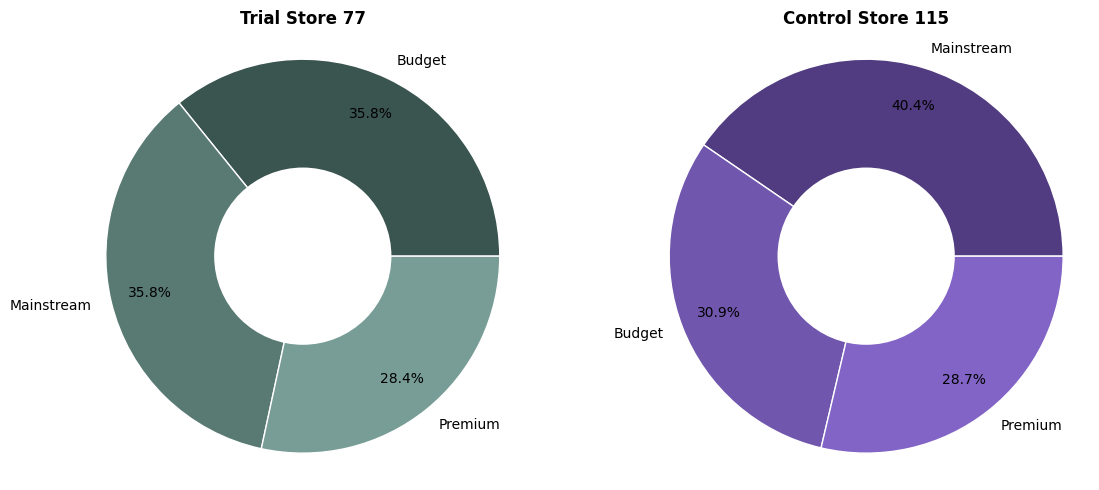

In [ ]:
comparison2(77,control_77)

***`Inference :`*** In our previous project we have seen that the stores were performing better with the mainstream customers. Here, in the above piechart we can see that control store 115 got much better customer as compared to the trial store 77. Which resulted a difference in sales between two stores.

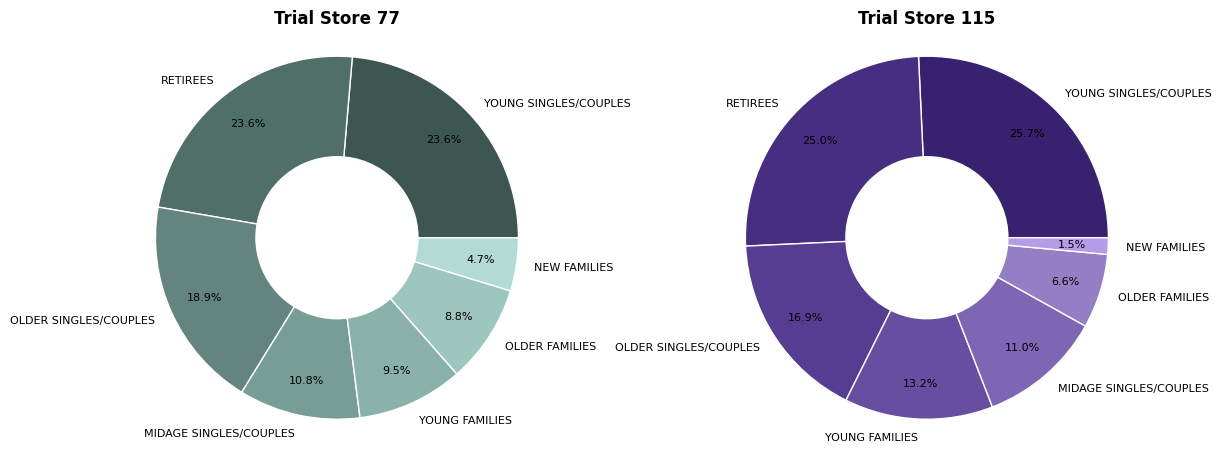

In [ ]:
comparison3(77,control_77)

***`Inference :`*** The customer segment based on lifestages doesn't differ much between two stores. As we can see, sales were mainly coming from young/single couples, retirees, older singles/couples.

Let's check the performances of the other trial stores.

# *Store performance comparison for the trial store 86 and control store 22*

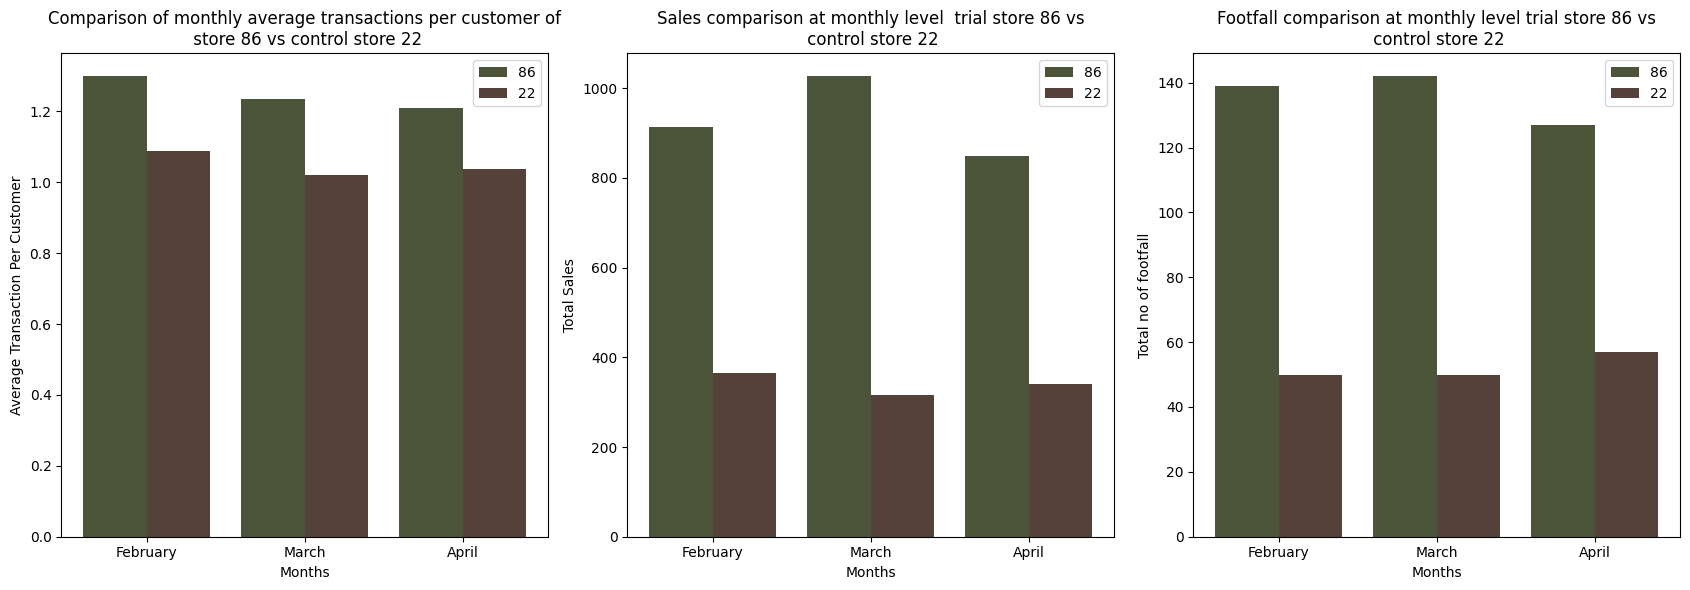

In [ ]:
comparison1(86,control_86)

***`Inference :`*** The above graph shows us the comparison between the trial store 86 and control store 22. As we can see in all the three graphs the performance were proportionate and significantly high for the trial store 86 in the three consecutive months. Let's check the sales drivers for these two stores.

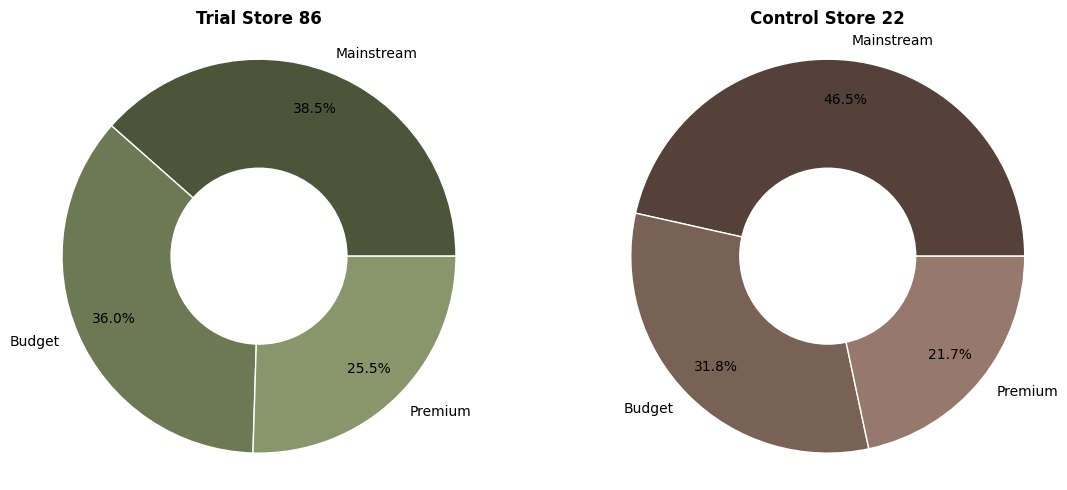

In [ ]:
comparison2(86,control_86)

***`Inference :`*** The above two piecharts represents the types of customers the trial store 86 and control store 22 came across. Although the control store had much more mainstream customers, the performance of the store 86 was great. From here, we can assume that the performance does not always depends on the type of customers, it depends on the other factors as well.

Let's check the lifestages of the customers for these two stores.

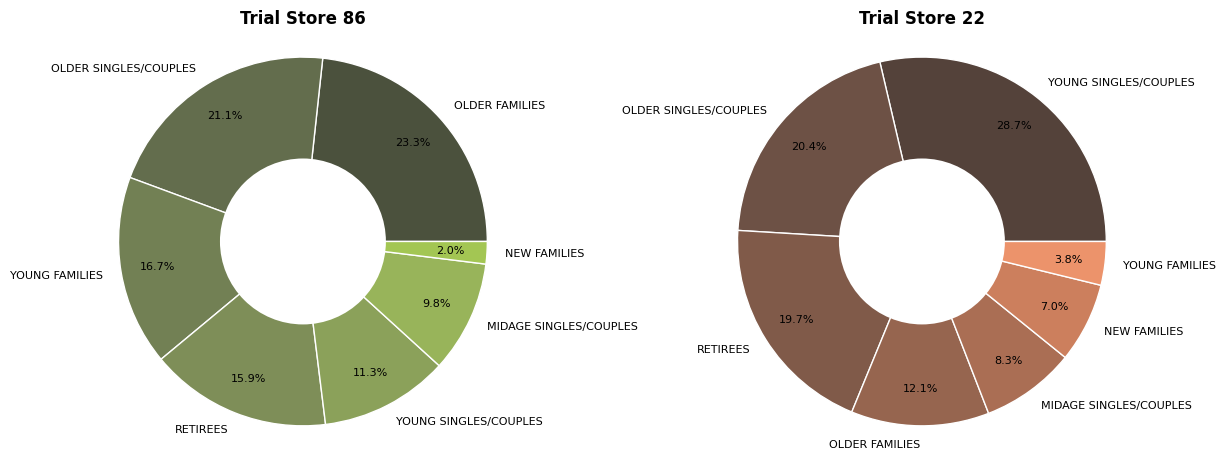

In [ ]:
comparison3(86, control_86)

***`Inference :`*** The trial store 86 came across a large number of older families, Older single/ couples, young families and retiress. Where as the trial store 22 got more young single/couple, new families, retirees as compared to the store 86. Clearly, older families and older single couples gives more sales than any other lifestage category of customers.

# *Store performance comparison for the trial store 88 and control store 201*

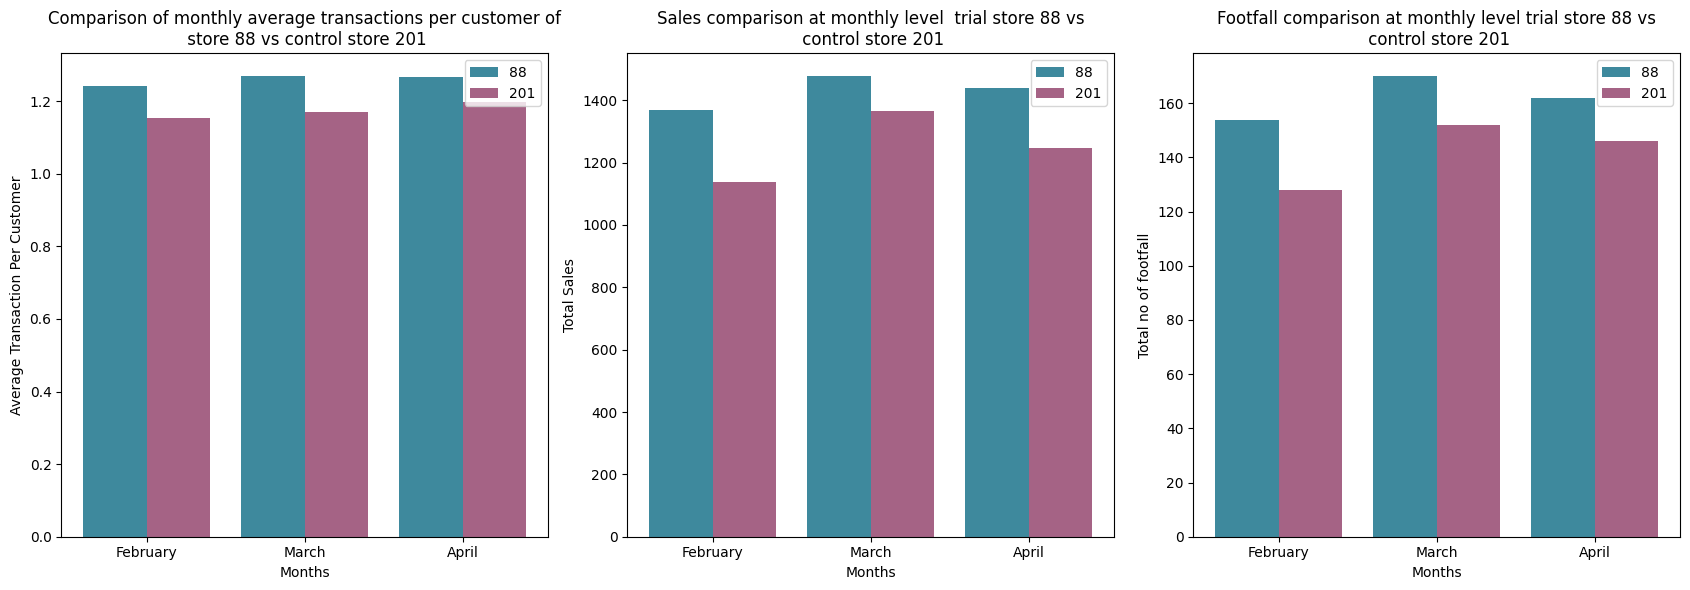

In [ ]:
comparison1(88,control_88)

***`Inference :`*** The above graph shows us the comparison of performance of the trial store 88 and the corresponding control store 201. As we can see in the graph, the performance of the trial store is quite better than the control store in terms of ATP, sales, and footfall for the three consecutive months.

Further, let's check their customer segments.

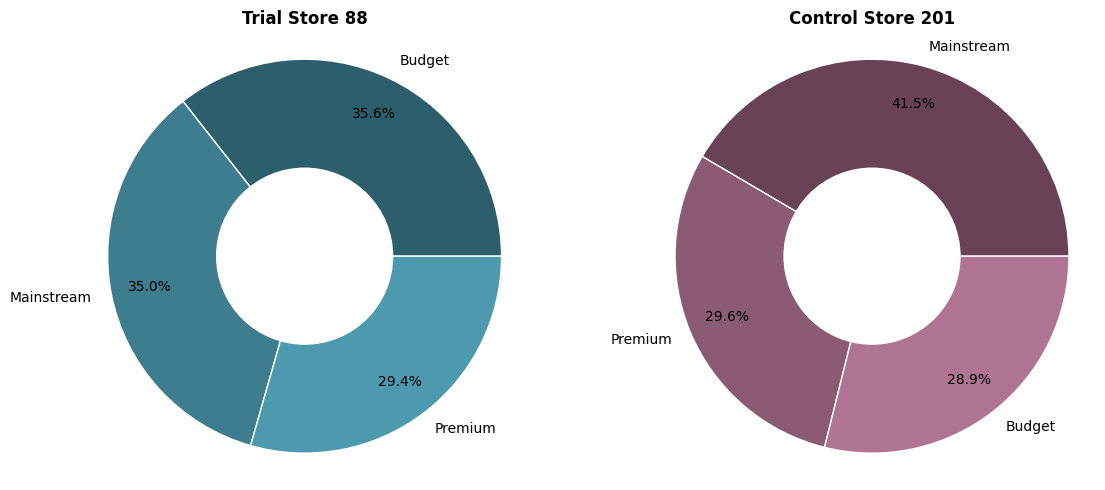

In [ ]:
comparison2(88,control_88)

***`Inference :`*** As we infered earlier that the performance does not always depend on the type of customer, it depends on lot of other factors as well. From the above grpah we can see that the control store 201 got a lot of mainstream customers as compared to the trail store 88. Where as the trial store had came across almost equal percentage of mainstream and budget customers which is more or less 35%.

Let's check the different lifestages of customer for both of the stores.

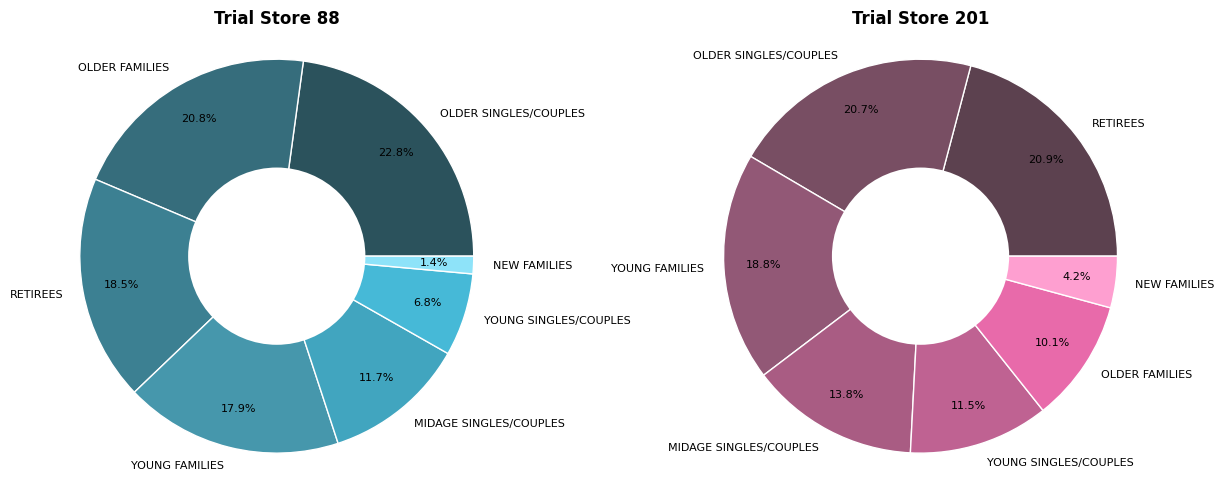

In [ ]:
comparison3(88,control_88)

***`Inference :`*** After comparing the different lifestages of customers for both the stores, the trial store 88 got much higher number of older singles/couples, older families than the control store 201. Which had given much higher sales to the trial store.

# Overall Summary :

In this analysis, we compared the performance of several trial stores with their corresponding control stores over three consecutive months. We focused on three main metrics: Average Transaction Per Customer (ATP), Total Sales, and Footfall (number of customers).

For Trial Store 77 and Control Store 115, the monthly average transaction was similar, but the total sales for the trial store were lower despite having more customers. This suggests that the control store can perform better with slightly fewer customers. Both stores had a similar customer segment based on lifestages, with sales mainly coming from young/single couples, retirees, and older singles/couples.

In contrast, Trial Store 86 performed significantly better than Control Store 155 in all metrics. Although the control store had more mainstream customers, the performance of the trial store was outstanding. This indicates that other factors besides customer types played a crucial role in its success.

Trial Store 86 attracted a diverse range of customers, including older families, older singles/couples, young families, and retirees. On the other hand, Trial Store 22 had more young single/couple and new families, along with retirees. The data showed that older families and older singles/couples contributed the most to sales.

When comparing Trial Store 88 and Control Store 201, the trial store outperformed the control store in terms of ATP, sales, and footfall for the three consecutive months. Control Store 201 had more mainstream customers, while Trial Store 88 had an almost equal distribution of mainstream and budget customers. Trial Store 88's higher number of older singles/couples and older families contributed to its higher sales.

Overall, this analysis highlights that the performance of a store is influenced by various factors, and the type of customers alone does not determine success. Understanding the demographics of customers and their preferences can help optimize strategies to boost sales and improve overall store performance.